# Predicting Bicycle traffic using time series

### Load Data and  start exploring

In [70]:
# import all the required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [71]:
#Load the data
fb = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [5]:
print(fb.head(5))
print(fb.tail(5))

                     Fremont Bridge East Sidewalk  \
Date                                                
2012-10-03 00:00:00                           9.0   
2012-10-03 01:00:00                           6.0   
2012-10-03 02:00:00                           1.0   
2012-10-03 03:00:00                           3.0   
2012-10-03 04:00:00                           1.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           4.0  
2012-10-03 01:00:00                           4.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           2.0  
2012-10-03 04:00:00                           6.0  
                     Fremont Bridge East Sidewalk  \
Date                                                
2018-06-30 19:00:00                          39.0   
2018-06-30 20:00:00                          30.0   
2018-06-30 21:00:00                          21.0   

In [74]:
# Details of dataset
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   East    50319 non-null  float64
 1   West    50319 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [75]:
# No. of rows and columns
fb.shape

(50328, 2)

In [76]:
fb.columns = ['East','West']
fb.head(5)

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [77]:
fb['Total'] = fb.eval('East + West')
fb.head(5)

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [78]:
# Check for null values
fb.isna().sum()

East     9
West     9
Total    9
dtype: int64

In [79]:
fb.dropna(inplace=True)
fb.count()

East     50319
West     50319
Total    50319
dtype: int64

In [12]:
fb.describe()

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


Text(0, 0.5, 'Hourly Bicycle Count')

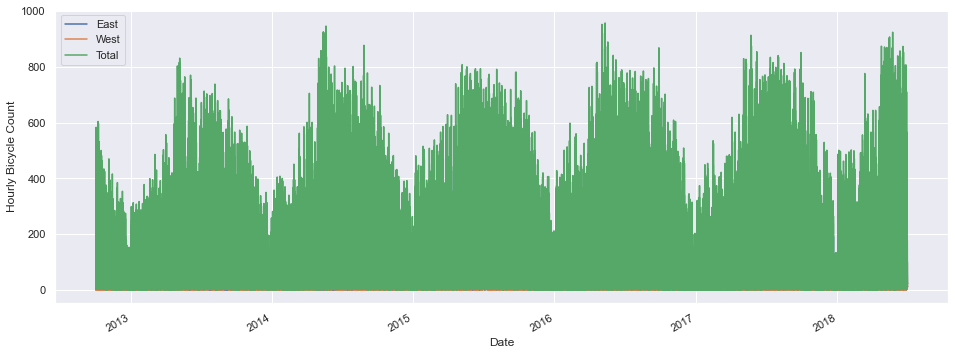

In [13]:
# For hourly analysis the plot is way too dense,it becomes very difficult to differentiate between 
#East and West data in the graph
fb.plot(kind='line', figsize=(16,6))
plt.legend(loc='upper left')
plt.ylabel('Hourly Bicycle Count')

fb_daily size : 6291


Text(0, 0.5, 'Daily Bicycle Count')

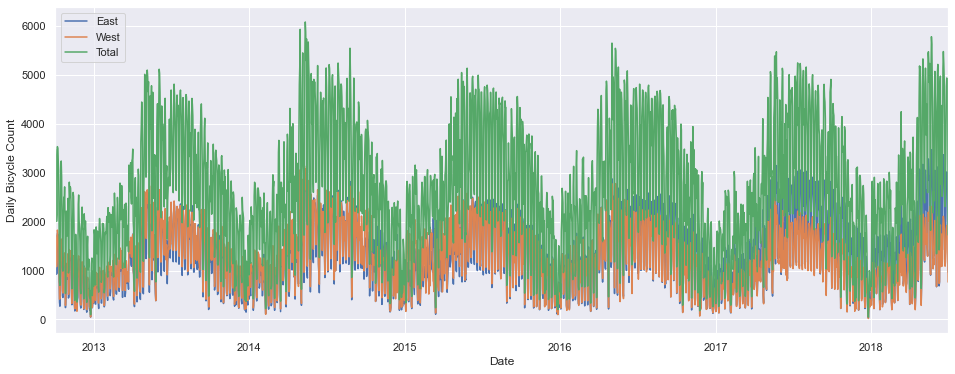

In [80]:
# lets resample the data for daily basis and plot the graph
fb_daily = fb.resample('d').sum()
print('fb_daily size :',fb_daily.size)
fb_daily.plot(kind='line', figsize=(16,6))
plt.ylabel('Daily Bicycle Count')

fb_weekly size : 900


Text(0, 0.5, 'Weekly Bicycle Count')

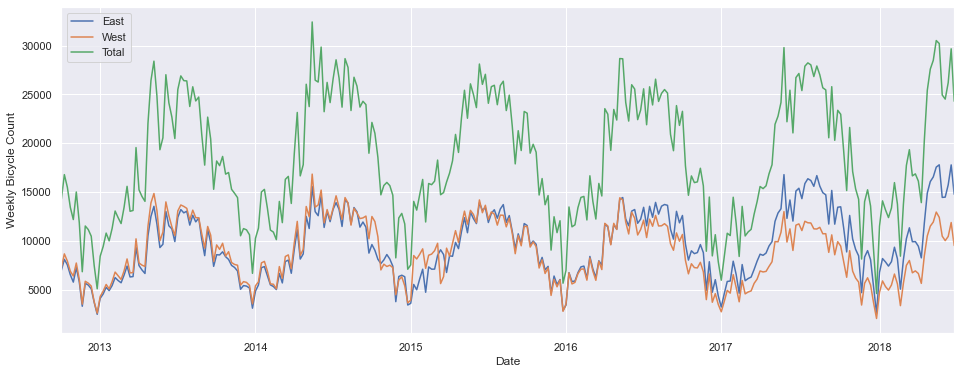

In [81]:
# Again, lets resample data for weekly, plot the graph
# From graph we can infer a trend - people tends to ride bike more in summer than winter 
# their is continuous change in every seasons also due to temperature, precipitation and other factors. 

fb_weekly = fb_daily.resample('W').sum()
print('fb_weekly size :',fb_weekly.size)
fb_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel('Weekly Bicycle Count')

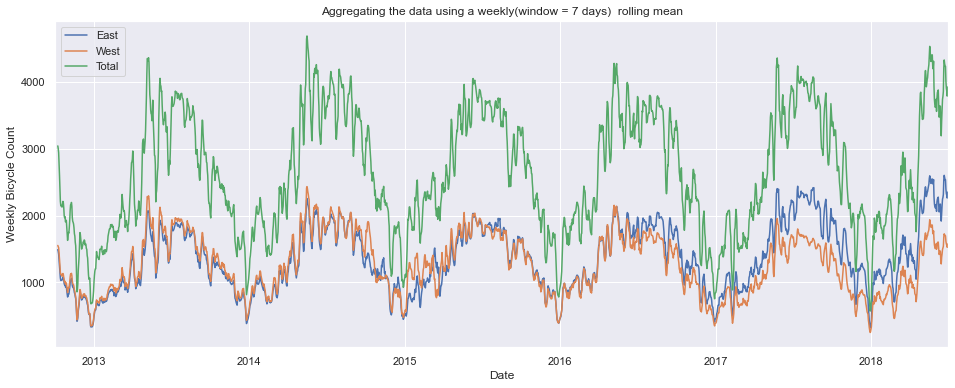

In [82]:
# The same weekly  plot can be pllot from daily dataset like below
fb_daily.rolling(window=7).mean().plot(kind='line', figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()

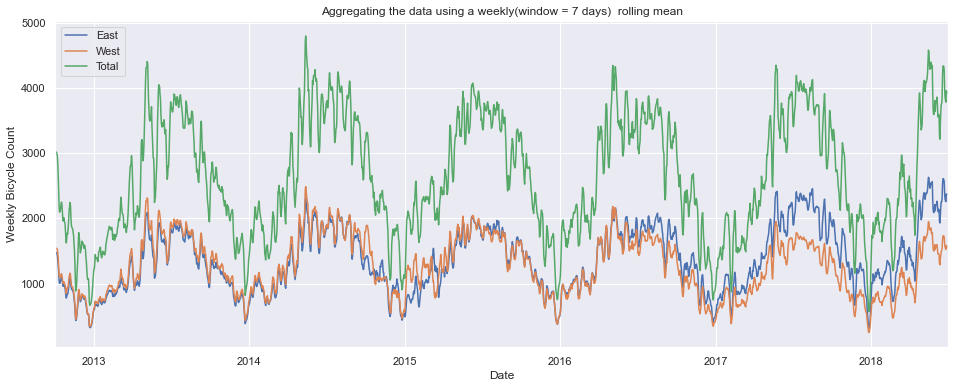

In [83]:
# We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.
# The above weekly plot is a little jagged and can be smoothened like below:
# The following code specifies both the width of the window = 7 and width of the Gaussian within the window = 3:
# Smoothening isn't really not good in this case
fb_daily.rolling(window=7, center=True, win_type='gaussian').mean(std=5).plot(figsize=(16,6))
plt.title('Aggregating the data using a weekly(window = 7 days)  rolling mean')
plt.ylabel('Weekly Bicycle Count')
plt.show()


Hourly Ticks : [    0  3600  7200 10800 14400 18000 21600 25200 28800 32400 36000 39600
 43200 46800 50400 54000 57600 61200 64800 68400 72000 75600 79200 82800]


(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

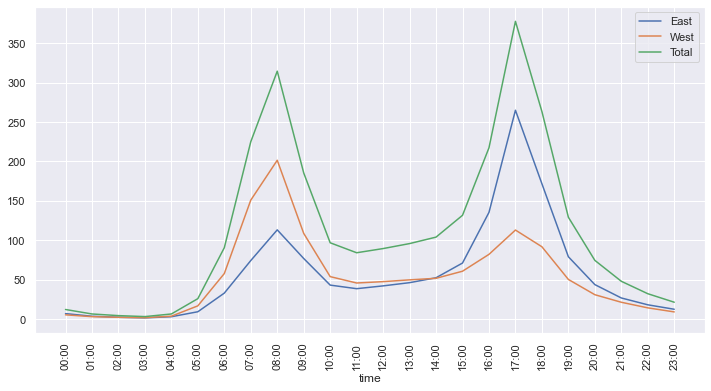

In [84]:
# We might want to look at the average traffic as a function of the time of day.
# The hourly traffic is a strongly bimodal distribution  
# with peaks around 8:00 in the morning and 5:00 in the evening.
gby_time = fb.groupby(fb.index.time).mean()
hourly_ticks = 60 * 60 * np.arange(24)
print('Hourly Ticks :', hourly_ticks)
gby_time.plot(xticks=hourly_ticks,figsize=(12,6))
plt.xticks(rotation='vertical')

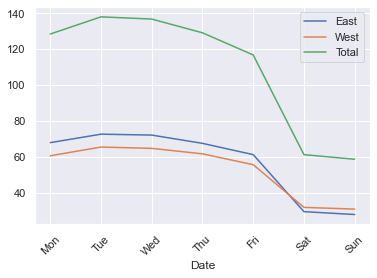

In [87]:
# We also might be curious about how things change based on the day of the week. 
# Again, we can do this with a simple groupby
# This shows a strong distinction between weekday and weekend totals, 
# with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.
gby_week = fb.groupby(fb.index.dayofweek).mean()
# print(gby_week)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
# gby_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
gby_week.plot()
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.show()


In [88]:
weekday_mask = np.where(fb_daily.index.weekday < 5, 'Weekday', 'Weekend') # 5 and 6 are Sat and Sun => Weekend
len(weekday_mask)
weekday_mask

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekend'], dtype='<U7')

In [89]:
# See how the hourly trend looks like between weekdays and weekends
# Now that  means we arer grouping-by weekday-mask and hourly-time
weekday_mask = np.where(fb.index.weekday < 5, 'weekday','weekend')
gby_hourly = fb.groupby([weekday_mask,fb.index.time]).mean()
gby_hourly

East        West       Total
weekday 00:00:00    5.677570    4.524032   10.201602
        01:00:00    2.652203    2.345794    4.997997
        02:00:00    1.658879    1.717623    3.376502
        03:00:00    1.257677    1.463284    2.720961
        04:00:00    3.121495    4.177570    7.299065
        05:00:00   11.488652   21.580774   33.069426
        06:00:00   42.443925   77.341121  119.785047
        07:00:00   97.971963  204.359146  302.331108
        08:00:00  147.653538  269.373832  417.027370
        09:00:00   92.638611  134.694723  227.333333
        10:00:00   42.968604   53.894456   96.863059
        11:00:00   33.100868   39.279225   72.380094
        12:00:00   35.603206   39.314629   74.917836
        13:00:00   39.546061   41.441923   80.987984
        14:00:00   47.839786   43.969960   91.809746
        15:00:00   74.164219   57.078772  131.242991
        16:00:00  166.096128   89.437250  255.533378
        17:00:00  350.750334  136.798398  487.548732
        18:00:00  224.821095  111.507343  336.328438
        19:00:00   99.644192   59.183578  158.827770
        20:00:00   52.670227   35.348465   88.018692
        21:00:00   31.110814   24.193591   55.304406
        22:00:00   20.170895   15.648865   35.819760
        23:00:00   13.096128    9.482644   22.578772
weekend 00:00:00    9.545910    6.944908   16.490818
        01:00:00    5.295492    4.292154    9.587646
        02:00:00    3.324916    3.021886    6.346801
        03:00:00    1.716194    1.926544    3.642738
        04:00:00    2.078464    1.749583    3.828047
        05:00:00    3.245409    4.240401    7.485810
        06:00:00    8.671119    8.328881   17.000000
        07:00:00   14.470785   16.916528   31.387312
        08:00:00   26.624374   31.497496   58.121870
        09:00:00   36.976628   43.454090   80.430718
        10:00:00   42.921536   53.320534   96.242070
        11:00:00   51.676127   61.450751  113.126878
        12:00:00   57.891486   67.459098  125.350584
        13:00:00   62.302170   70.053422  132.355593
        14:00:00   63.383973   70.664441  134.048414
        15:00:00   62.979967   69.353923  132.333890
        16:00:00   58.173623   63.382304  121.555927
        17:00:00   50.275459   52.961603  103.237062
        18:00:00   38.590985   41.908180   80.499165
        19:00:00   27.233723   27.574290   54.808013
        20:00:00   20.891486   19.317195   40.208681
        21:00:00   15.410684   13.632721   29.043406
        22:00:00   12.422371   10.140234   22.562604
        23:00:00   10.305509    7.535893   17.841402

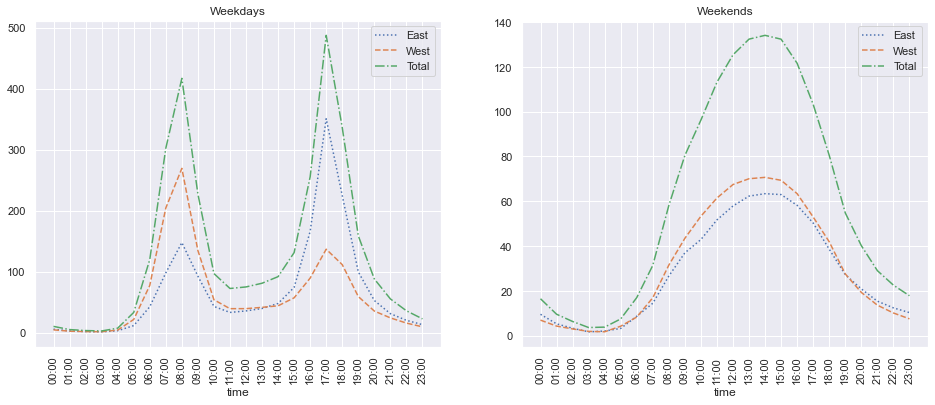

In [91]:
hourly_ticks = 60 * 60 * np.arange(24)
fig, ax = plt.subplots(1,2,figsize=(16,6))
gby_hourly.loc['weekday',:].plot(ax=ax[0], xticks=hourly_ticks, title='Weekdays', style=[':','--','-.'])
gby_hourly.loc['weekend',:].plot(ax=ax[1], xticks=hourly_ticks, title='Weekends', style=[':','--','-.'])


# plt.xticks(rotation=90) only affects the last subplot whose reference is active
# To change the xticks on every sub-plot
# We see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
# It would be interesting to dig through this data in more detail, and examine the effect of weather, 
# temperature, time of year, and other factors on people’s commuting patterns
for x in ax:
    x.xaxis.set_tick_params(rotation=90)
    

# Data Wrangling by merging Datasets (Fremont Bridge and Weather Data)

In [92]:
# Load Daily Weather data of Fremont Bridge
wd = pd.read_csv('data/1404899.csv', index_col='DATE', parse_dates=True)

In [93]:
wd.shape

(2097, 25)

In [94]:
fb_daily.shape 

(2097, 3)

In [95]:
wd.head(5)

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT02,WT03,WT04,WT05,WT08,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
wd.columns

Index(['STATION', 'NAME', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT08', 'WT13', 'WT14', 'WT16', 'WT18', 'WT22'],
      dtype='object')

In [97]:
wd[['STATION','NAME','PRCP','SNOW','TMAX','TMIN']].isnull().sum()

STATION    0
NAME       0
PRCP       0
SNOW       0
TMAX       0
TMIN       0
dtype: int64

In [98]:
wd = wd.filter(['STATION','NAME','PRCP','SNOW','TMAX','TMIN'], axis=1)
wd.head(5)

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,46
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,66,47
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,71,48
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",0.0,0.0,75,46


In [99]:
# How Snowy days are recorded? how do the values look like?
np.sort( wd.SNOW.unique() ) # So the values range between 0 and 5.1

array([0. , 0.1, 0.4, 0.5, 0.6, 0.8, 1. , 1.1, 1.6, 2. , 2.9, 3. , 5.1])

In [100]:
np.sort( wd.PRCP.unique() ) # So the values range between 0 and 2.2

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.7 , 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.79,
       0.8 , 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.91, 0.93,
       0.94, 1.  , 1.03, 1.04, 1.05, 1.08, 1.09, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.18, 1.19, 1.2 , 1.21, 1.23, 1.26, 1.27, 1.28, 1.3 , 1.31,
       1.32, 1.35, 1.36, 1.4 , 1.5 , 1.51, 1.54, 1.61, 1.63, 1.7 , 1.71,
       1.74, 1.75, 1.84, 1.86, 2.13, 2.2 ])

In [101]:
wd.loc[ (wd['SNOW'] > 0) & (wd['PRCP'] == 0) ] # No rows available. So, the precipitation (PRCP) cannot be 0, when it Snows (SNOW > 0).

,STATION,NAME,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,


In [102]:
# df = fb_daily['Total'].copy()
df = fb_daily.filter(['Total'], axis=1)
print('Shape : ',df.shape)
df.head(5)

Shape :  (2097, 1)


,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


#### Feature Engineering : Categorical Values
* We saw previously that the patterns of use generally vary from day to day; let’s account for this in our data by adding binary columns that indicate the day of the week.
* Similarly, we might expect riders to behave differently on holidays; let’s add an indicator of this as well.

In [103]:
print(weekdays)
print(list(range(7)))

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
[0, 1, 2, 3, 4, 5, 6]


In [104]:
# Feature  Engineering : Categorical Values : adding binary columns that indicate the day of the week
for i in range(7):
    df[weekdays[i]] = (df.index.weekday ==  i).astype(int)
df.head(7)    

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1
2012-10-08,3537.0,1,0,0,0,0,0,0
2012-10-09,3501.0,0,1,0,0,0,0,0


In [105]:
# df.columns['Total'] = df.columns['TotalBikesCount']
df = df.rename(columns={'Total':'TotalBikesCount'})
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0
2012-10-04,3475.0,0,0,0,1,0,0,0
2012-10-05,3148.0,0,0,0,0,1,0,0
2012-10-06,2006.0,0,0,0,0,0,1,0
2012-10-07,2142.0,0,0,0,0,0,0,1


In [106]:
# Assuming, riders to behave differently on holidays.; we add an indicator for this by incorporating National Holiday Calendar:
from pandas.tseries.holiday import USFederalHolidayCalendar # Can't believe panda has a class for this!
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2018')
df = df.join(pd.Series(1, index=holidays, name='holiday'))
df['holiday'].fillna(0, inplace=True)
df.head()

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0.0
2012-10-04,3475.0,0,0,0,1,0,0,0,0.0
2012-10-05,3148.0,0,0,0,0,1,0,0,0.0
2012-10-06,2006.0,0,0,0,0,0,1,0,0.0
2012-10-07,2142.0,0,0,0,0,0,0,1,0.0


In [107]:
# df.drop(['holiday'], axis=1, inplace=True)
df['holiday'] = df['holiday'].astype(int)

In [108]:
df['holiday'].unique()

array([0, 1])

### Accounting for the Duration of Daylight

In [40]:
# We also suspect that the hours of daylight would affect how many people ride; 
# let’s use the standard astronomical calculation to add this information
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

/Applications/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


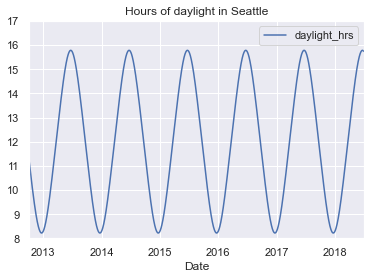

In [110]:
# The daylight varies between 8 hrs (during Dececmber) and 16 hrs (June).
df['daylight_hrs'] = list(map(hours_of_daylight, df.index))
df[['daylight_hrs']].plot(fig=(16,4))
plt.ylim(8,17) # Increased y-axis limit max range by 1. Helps in placing the legend neatly without overlapping on the curve
plt.legend(loc='upper right')
plt.title('Hours of daylight in Seattle')
plt.show()

In [111]:
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208


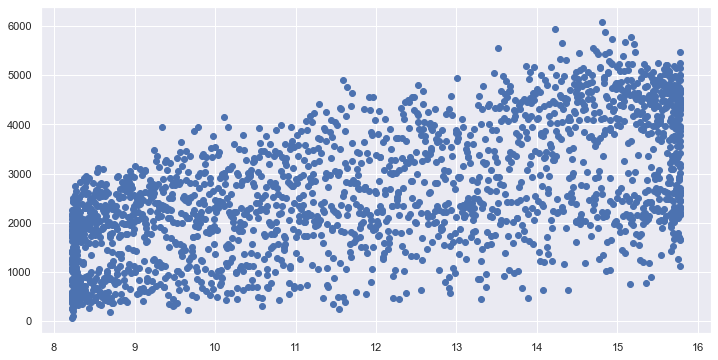

In [113]:
# Does day-light duration affect bicycle traffic? Let's validate that assumption with scatter plot.

# Plotting with Seaborn
# sns.lmplot('daylight_hrs','TotalBikesCount',data=df, fit_reg=False, size=5, scatter=True)

# plotting with Matplotlib
# plt.plot(df['daylight_hrs'],df['TotalBikesCount'])
plt.figure(figsize=(12,6)) # This should be set before drawing the plot
plt.scatter(df['daylight_hrs'],df['TotalBikesCount'])
plt.show()

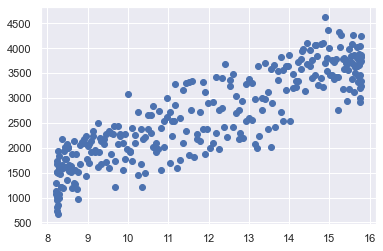

In [114]:
# Drawing the plot with resampled data
weekly = df.resample('W').mean()
# weekly.head()
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])
# So this clears the density to a large extent and we can see the trruthiness of our assumption - More daylight hours, more traffic

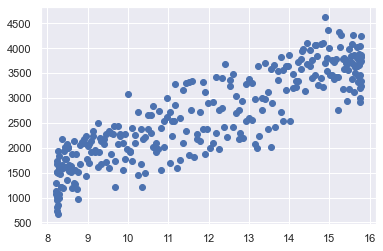

In [115]:
# sample = df.sample(n=500)
sample = df.sample(frac=0.1) # 10% of data ffrom the df
plt.scatter(weekly['daylight_hrs'],weekly['TotalBikesCount'])

In [117]:
# Can we see how the change in the duration affects the cycle traffic quantitatively?
# We can with LR's coefficient
from sklearn.linear_model import LinearRegression

x = sample[['daylight_hrs']]
y = sample['TotalBikesCount']
clf = LinearRegression(fit_intercept=True).fit(x, y)
ypred = clf.predict(x)
print(clf.coef_) # OP: ~295 ## Now that means on any given day, each extra hour of daylight
                            ## leads to about 300 more cyclers using the bridge

[316.85041252]


#### Now be a data scientist and ask yourself?

So is the seasonal increase daylight duration the real factor for the rise in bicyclers?
Or do we actually see a trend in the rise in bicyclers?
The way we can find answers to this is by doing a de-trending on the data. 

This is what I mean by "de-trended" data. We've basically removed the component of the data which correlates with the number of hours in a day, so that what is left is in some way agnostic to this quantity. The "adjusted weekly count" plotted here can be thought of as the number of cyclists we'd expect to see if the hours of daylight were not a factor.

**With the data de-trended, we get a better idea of how bicycling in Seattle has changed over time, corrected for the seasonal variation.**

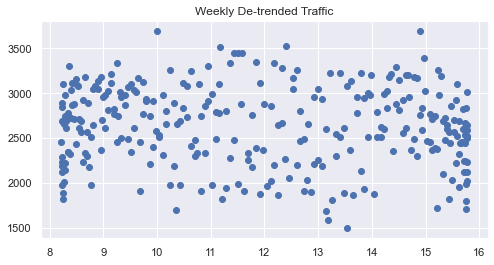

In [118]:
# Now that we have fit this trend, let's subtract it off and replace it by the mean:
trend = clf.predict(weekly[['daylight_hrs']]) # Trend is the weekly-predictions
detrended = trend.mean() + (weekly['TotalBikesCount'] - trend )
plt.figure(figsize=(8,4))
plt.scatter(weekly['daylight_hrs'],detrended)
plt.title('Weekly De-trended Traffic')
plt.show()

<AxesSubplot:xlabel='Date'>

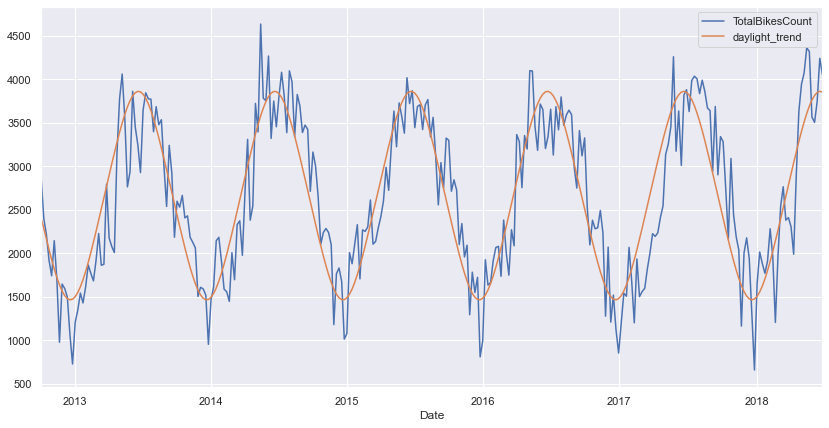

In [119]:
# Let's visualize this another way. in 2 steps.
# Step 1: Instead of plotting the number of riders vs daylight hours, 
# we'll again plot the number of riders vs the day of the year, along with the trend
weekly['daylight_trend'] = trend
weekly[['TotalBikesCount','daylight_trend']].plot(figsize=(14,7))

The STD of the detrended cyclists is 439


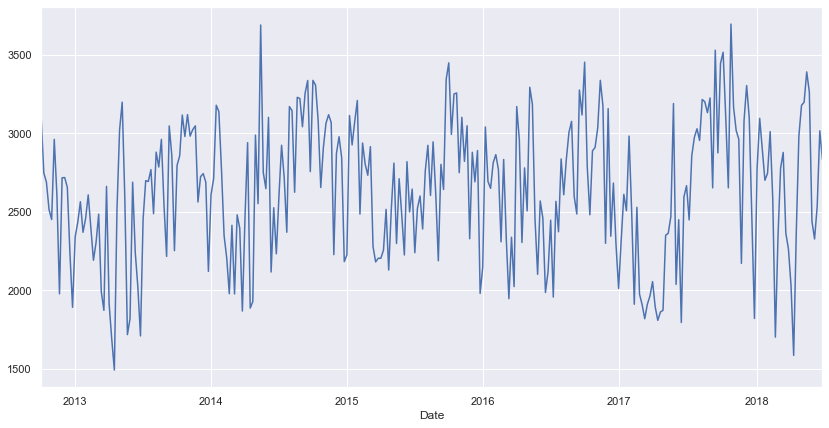

In [120]:
# Step 2: We can similarly view the adjusted total number of riders over time by subtracting this green line from the blue line:
detrended.plot(figsize=(14,7))
print('The STD of the detrended cyclists is {0:.0f}'.format(detrended.std()))

In [121]:
# Adding average temperature
# # temperatures are in 1/10 deg C; convert to C
tmin = wd['TMIN'] / 10
tmax = wd['TMAX'] / 10
wd['AvgTempInC'] = (tmin + tmax) / 2
df = df.join(wd['AvgTempInC'])
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC
Date,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05


In [122]:
# precip is in 1/10 mm; convert to inches
wd['PRCP_IN'] = wd['PRCP'] / 254
wd['DryDay'] = (wd['PRCP'] == 0).astype(int)
df = df.join(wd[['PRCP_IN','DryDay']])
df.head(15)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,AvgTempInC,PRCP_IN,DryDay
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.000000,1
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.000000,1
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.000000,1
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.000000,1
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.000000,1
2012-10-08,3537.0,1,0,0,0,0,0,0,1,10.987503,5.80,0.000000,1
2012-10-09,3501.0,0,1,0,0,0,0,0,0,10.929950,5.45,0.000000,1
2012-10-10,3235.0,0,0,1,0,0,0,0,0,10.872560,5.05,0.000000,1
2012-10-11,3047.0,0,0,0,1,0,0,0,0,10.815345,5.10,0.000000,1


In [123]:
df = df.rename(columns={'daylight_hrs':'DayLightHrs'})
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay'],
      dtype='object')

In [124]:
# Finally, let’s add a counter that increases from day 1, and measures how many years have passed. 
# This will let us measure any observed annual increase or decrease in daily crossings:
df['YearsCount'] = (df.index - df.index[0]).days / 365.
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


#### Persist Processed Data

In [125]:
df = df.reset_index()
df.head(5)

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [126]:
#df.to_csv('data/processed_data.csv')

In [127]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
TotalBikesCount           float64
Mon                         int64
Tue                         int64
Wed                         int64
Thu                         int64
Fri                         int64
Sat                         int64
Sun                         int64
holiday                     int64
DayLightHrs               float64
AvgTempInC                float64
PRCP_IN                   float64
DryDay                      int64
YearsCount                float64
dtype: object

In [128]:
df = df.set_index('Date')
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [129]:
df.shape

(2097, 14)

In [130]:
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay',
       'YearsCount'],
      dtype='object')

In [131]:
# fit_intercept : whether to calculate the intercept for this model. 
# If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
# In this use case, we'll set fit_intercept = False, 
# because the daily flags essentially operate as their own day-specific intercepts
indep_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay','YearsCount']
x = df[indep_cols]
y = df['TotalBikesCount']

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(x, y)

LinearRegression(fit_intercept=False)

In [133]:
predictions = model.predict(x)
predictions

array([3509.10208841, 3375.37680672, 3171.1559462 , ..., 4294.78165878,
       4075.72089562, 2626.74466652])

In [134]:
df1= df[['TotalBikesCount']].copy()
df1['Predictions'] = predictions
df1.head(5)

,TotalBikesCount,Predictions
Date,,
2012-10-03,3521.0,3509.102088
2012-10-04,3475.0,3375.376807
2012-10-05,3148.0,3171.155946
2012-10-06,2006.0,1859.059961
2012-10-07,2142.0,1776.258124


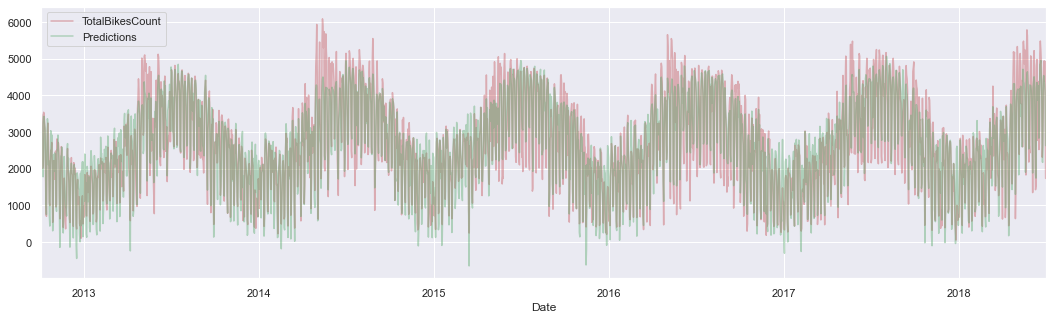

In [135]:
import datetime as dt
df1.plot(alpha=0.4, figsize=(18,5), color=['r','g'])
plt.legend(loc='upper left')
plt.show()
# If x-axis doesn't show years, make sure the 'Date' column was converted to datetime from String, before it was set as index

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).

Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [136]:
model.coef_

array([-6.54065823e+02, -5.26114967e+02, -5.40396337e+02, -6.88055804e+02,
       -1.00778818e+03, -2.35415766e+03, -2.43062192e+03, -1.20007497e+03,
        1.11462695e+02,  4.06258710e+02, -1.75737653e+05,  5.17444792e+02,
        4.02758119e+01])

In [137]:
coeffs = pd.Series(model.coef_, index=x.columns)
coeffs

Mon              -654.065823
Tue              -526.114967
Wed              -540.396337
Thu              -688.055804
Fri             -1007.788184
Sat             -2354.157663
Sun             -2430.621920
holiday         -1200.074973
DayLightHrs       111.462695
AvgTempInC        406.258710
PRCP_IN       -175737.652995
DryDay            517.444792
YearsCount         40.275812
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty.

We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [138]:
# The bootstrap/resapling is mainly used for test statistics rather than regression coefficients.
from sklearn.utils import resample
model.fit(x, y)
print('model.coef_',model.coef_)
model.fit(*resample(x, y))
print('model.coef_',model.coef_)
model.fit(*resample(x, y))
print('model.coef_',model.coef_)
print('Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?')


temp = np.asarray([
                [1,1,2,3,4], # 1st row
                [2,6,7,8,9], # 2nd row
                [3,6,7,8,9], # 3rd row
                [4,6,7,8,9], # 4th row
                [5,6,7,8,9]  # 5th row
              ])
print('temp :',temp)
print('temp resampled :',resample(temp))
print('Resampled data is different and seems close to the original one. And now you know why the coefficients are different.')

model.coef_ [-6.54065823e+02 -5.26114967e+02 -5.40396337e+02 -6.88055804e+02
 -1.00778818e+03 -2.35415766e+03 -2.43062192e+03 -1.20007497e+03
  1.11462695e+02  4.06258710e+02 -1.75737653e+05  5.17444792e+02
  4.02758119e+01]
model.coef_ [-7.17940772e+02 -5.85286344e+02 -5.94372685e+02 -7.14158788e+02
 -1.03917457e+03 -2.44791534e+03 -2.51143068e+03 -1.22379185e+03
  1.18482667e+02  4.03749586e+02 -1.50852389e+05  5.09643454e+02
  3.61702008e+01]
model.coef_ [-6.01598105e+02 -4.77238378e+02 -4.91051804e+02 -6.18667564e+02
 -8.96673843e+02 -2.29324608e+03 -2.35494493e+03 -1.08604780e+03
  1.04597197e+02  4.11001262e+02 -1.70094697e+05  5.09832475e+02
  3.38335736e+01]
Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?
temp : [[1 1 2 3 4]
 [2 6 7 8 9]
 [3 6 7 8 9]
 [4 6 7 8 9]
 [5 6 7 8 9]]
temp resampled : [[3 6 7 8 9]
 [4 6 7 8 9]
 [2 6 7 8 9]
 [4 6 7 8 9]
 [3 6 7 8 9]]
Resampled data is different and

In [139]:
from sklearn.utils import resample
np.random.seed(1)
coeffs_tmp = [model.fit(*resample(x, y)).coef_ for i in range(1000)]
err = np.std(coeffs_tmp,0) #Columnar STD

In [140]:
# With these errors estimated, let's again look at the results:
print(pd.DataFrame({'effect': coeffs.round(0),
                    'error': err.round(0)}))

               effect    error
Mon            -654.0     66.0
Tue            -526.0     69.0
Wed            -540.0     67.0
Thu            -688.0     67.0
Fri           -1008.0     66.0
Sat           -2354.0     64.0
Sun           -2431.0     64.0
holiday       -1200.0    114.0
DayLightHrs     111.0      7.0
AvgTempInC      406.0     16.0
PRCP_IN     -175738.0  11018.0
DryDay          517.0     25.0
YearsCount       40.0      6.0


#### Observations
* We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
* We see that for each additional hour of daylight, 121 ± 7 more people choose to ride; 
* A temperature increase of one degree Celsius encourages 390 ± 16 people to grab their bicycle; 
* A dry day means an average of 513 ± 25 more riders, and 
* Each inch of precipitation means 180406 ± 11018 more people leave their bike at home. 
* Once all these effects are accounted for, we see a modest increase of 30 ± 6 new daily riders each year.